In [1]:
!pip install tensorflow

In [2]:
from platform import python_version

print(python_version())

3.11.4


# Plant Disease Prediction

## Importing libraries

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [25]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [69]:
training_set.class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

## Building Model

In [28]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from tensorflow.keras.models import Sequential

In [29]:
cnn=Sequential()

### Building Convolution Layer

In [30]:
cnn.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [34]:

cnn.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(Dropout(0.25))

In [36]:
cnn.add(Flatten())

In [37]:
cnn.add(Dense(units=1500,activation='relu'))

In [38]:
cnn.add(Dropout(0.4))

In [39]:
#Output Layer
cnn.add(Dense(units=38,activation='softmax'))

In [40]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [42]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 5100s 2s/step - loss: 1.4111 - accuracy: 0.5858 - val_loss: 0.6509 - val_accuracy: 0.7966
Epoch 2/10
2197/2197 [==============================] - 4222s 2s/step - loss: 0.4785 - accuracy: 0.8487 - val_loss: 0.2940 - val_accuracy: 0.9042
Epoch 3/10
2197/2197 [==============================] - 4081s 2s/step - loss: 0.2889 - accuracy: 0.9070 - val_loss: 0.2127 - val_accuracy: 0.9338
Epoch 4/10
2197/2197 [==============================] - 4939s 2s/step - loss: 0.1982 - accuracy: 0.9360 - val_loss: 0.1931 - val_accuracy: 0.9403
Epoch 5/10
2197/2197 [==============================] - 4360s 2s/step - loss: 0.1467 - accuracy: 0.9518 - val_loss: 0.1500 - val_accuracy: 0.9524
Epoch 6/10
2197/2197 [==============================] - 4835s 2s/step - loss: 0.1139 - accuracy: 0.9620 - val_loss: 0.1436 - val_accuracy: 0.9575
Epoch 7/10
2197/2197 [==============================] - 4106s 2s/step - loss: 0.0914 - accuracy: 0.9693 - val_loss: 0.1346 -

## Evaluating Model

In [43]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 1220s 555ms/step - loss: 0.0230 - accuracy: 0.9922
Training accuracy: 0.9922184944152832


In [44]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 305s 555ms/step - loss: 0.1201 - accuracy: 0.9657
Validation accuracy: 0.965740978717804


## Saving Model

In [45]:
from tensorflow.keras.models import load_model

In [46]:
cnn.save("model.h5")

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
cnn.save('model.keras')

In [48]:
training_history.history #Return Dictionary of history

{'loss': [1.4110891819000244,
  0.47852271795272827,
  0.28889209032058716,
  0.19821088016033173,
  0.14669470489025116,
  0.11392371356487274,
  0.09140472114086151,
  0.07914748042821884,
  0.06817571073770523,
  0.0632462352514267],
 'accuracy': [0.5858169198036194,
  0.8486948013305664,
  0.9069777131080627,
  0.9360267519950867,
  0.9517746567726135,
  0.961974561214447,
  0.9692865610122681,
  0.9732840061187744,
  0.9777935743331909,
  0.9790312051773071],
 'val_loss': [0.6508887410163879,
  0.29398831725120544,
  0.2127244621515274,
  0.1930658519268036,
  0.15003858506679535,
  0.1436343789100647,
  0.134604811668396,
  0.1237083300948143,
  0.16668255627155304,
  0.12014223635196686],
 'val_accuracy': [0.7966082692146301,
  0.9041657447814941,
  0.9337582588195801,
  0.9403027296066284,
  0.9524242877960205,
  0.9575461149215698,
  0.9590826034545898,
  0.9629524350166321,
  0.9500910639762878,
  0.965740978717804]}

In [49]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [50]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

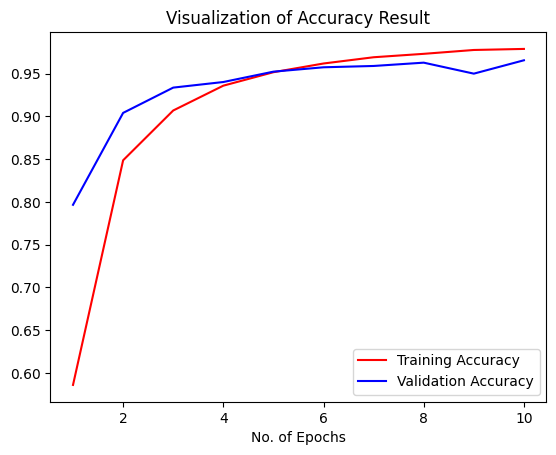

In [51]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [52]:
class_name = validation_set.class_names

In [53]:
len(class_name)

38

In [54]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [55]:
y_pred = cnn.predict(test_set)

17572/17572 [==============================] - 445s 25ms/step


In [56]:
y_pred[0]

array([9.9967694e-01, 6.1913524e-06, 1.4323504e-08, 1.2104538e-04,
       2.6885647e-07, 4.2637924e-10, 8.5212798e-10, 9.3833590e-09,
       5.3674552e-12, 7.0523298e-09, 1.5098683e-12, 3.8364048e-10,
       5.4663732e-11, 1.8575391e-11, 4.9344251e-08, 4.8062521e-10,
       1.8265743e-07, 4.6659560e-10, 9.6994757e-10, 3.2791142e-08,
       3.6341896e-06, 1.8751720e-04, 3.9366244e-09, 2.3094981e-10,
       3.4559104e-09, 7.5748394e-09, 2.6826827e-08, 3.5722928e-06,
       3.8061504e-10, 2.6378510e-07, 2.0262305e-09, 9.7486985e-10,
       6.2874840e-08, 1.7782013e-12, 5.8790719e-09, 1.4105957e-12,
       9.2323328e-13, 6.6124703e-11], dtype=float32)

In [57]:

predicted_categories = tf.argmax(y_pred, axis=1)

In [58]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [59]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

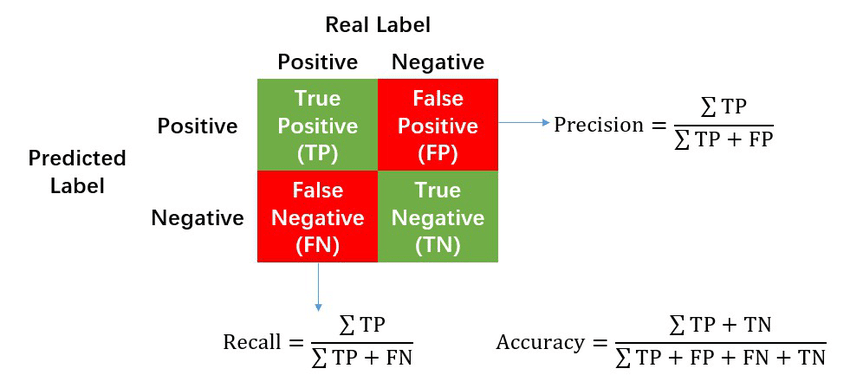

In [60]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[459,   3,   0, ...,   0,   0,   0],
       [  1, 488,   0, ...,   0,   0,   0],
       [  0,   0, 433, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 436,   0],
       [  0,   0,   1, ...,   0,   0, 462]], dtype=int64)

In [62]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.91      0.95       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.95      0.96      0.96       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.93      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.94      0.

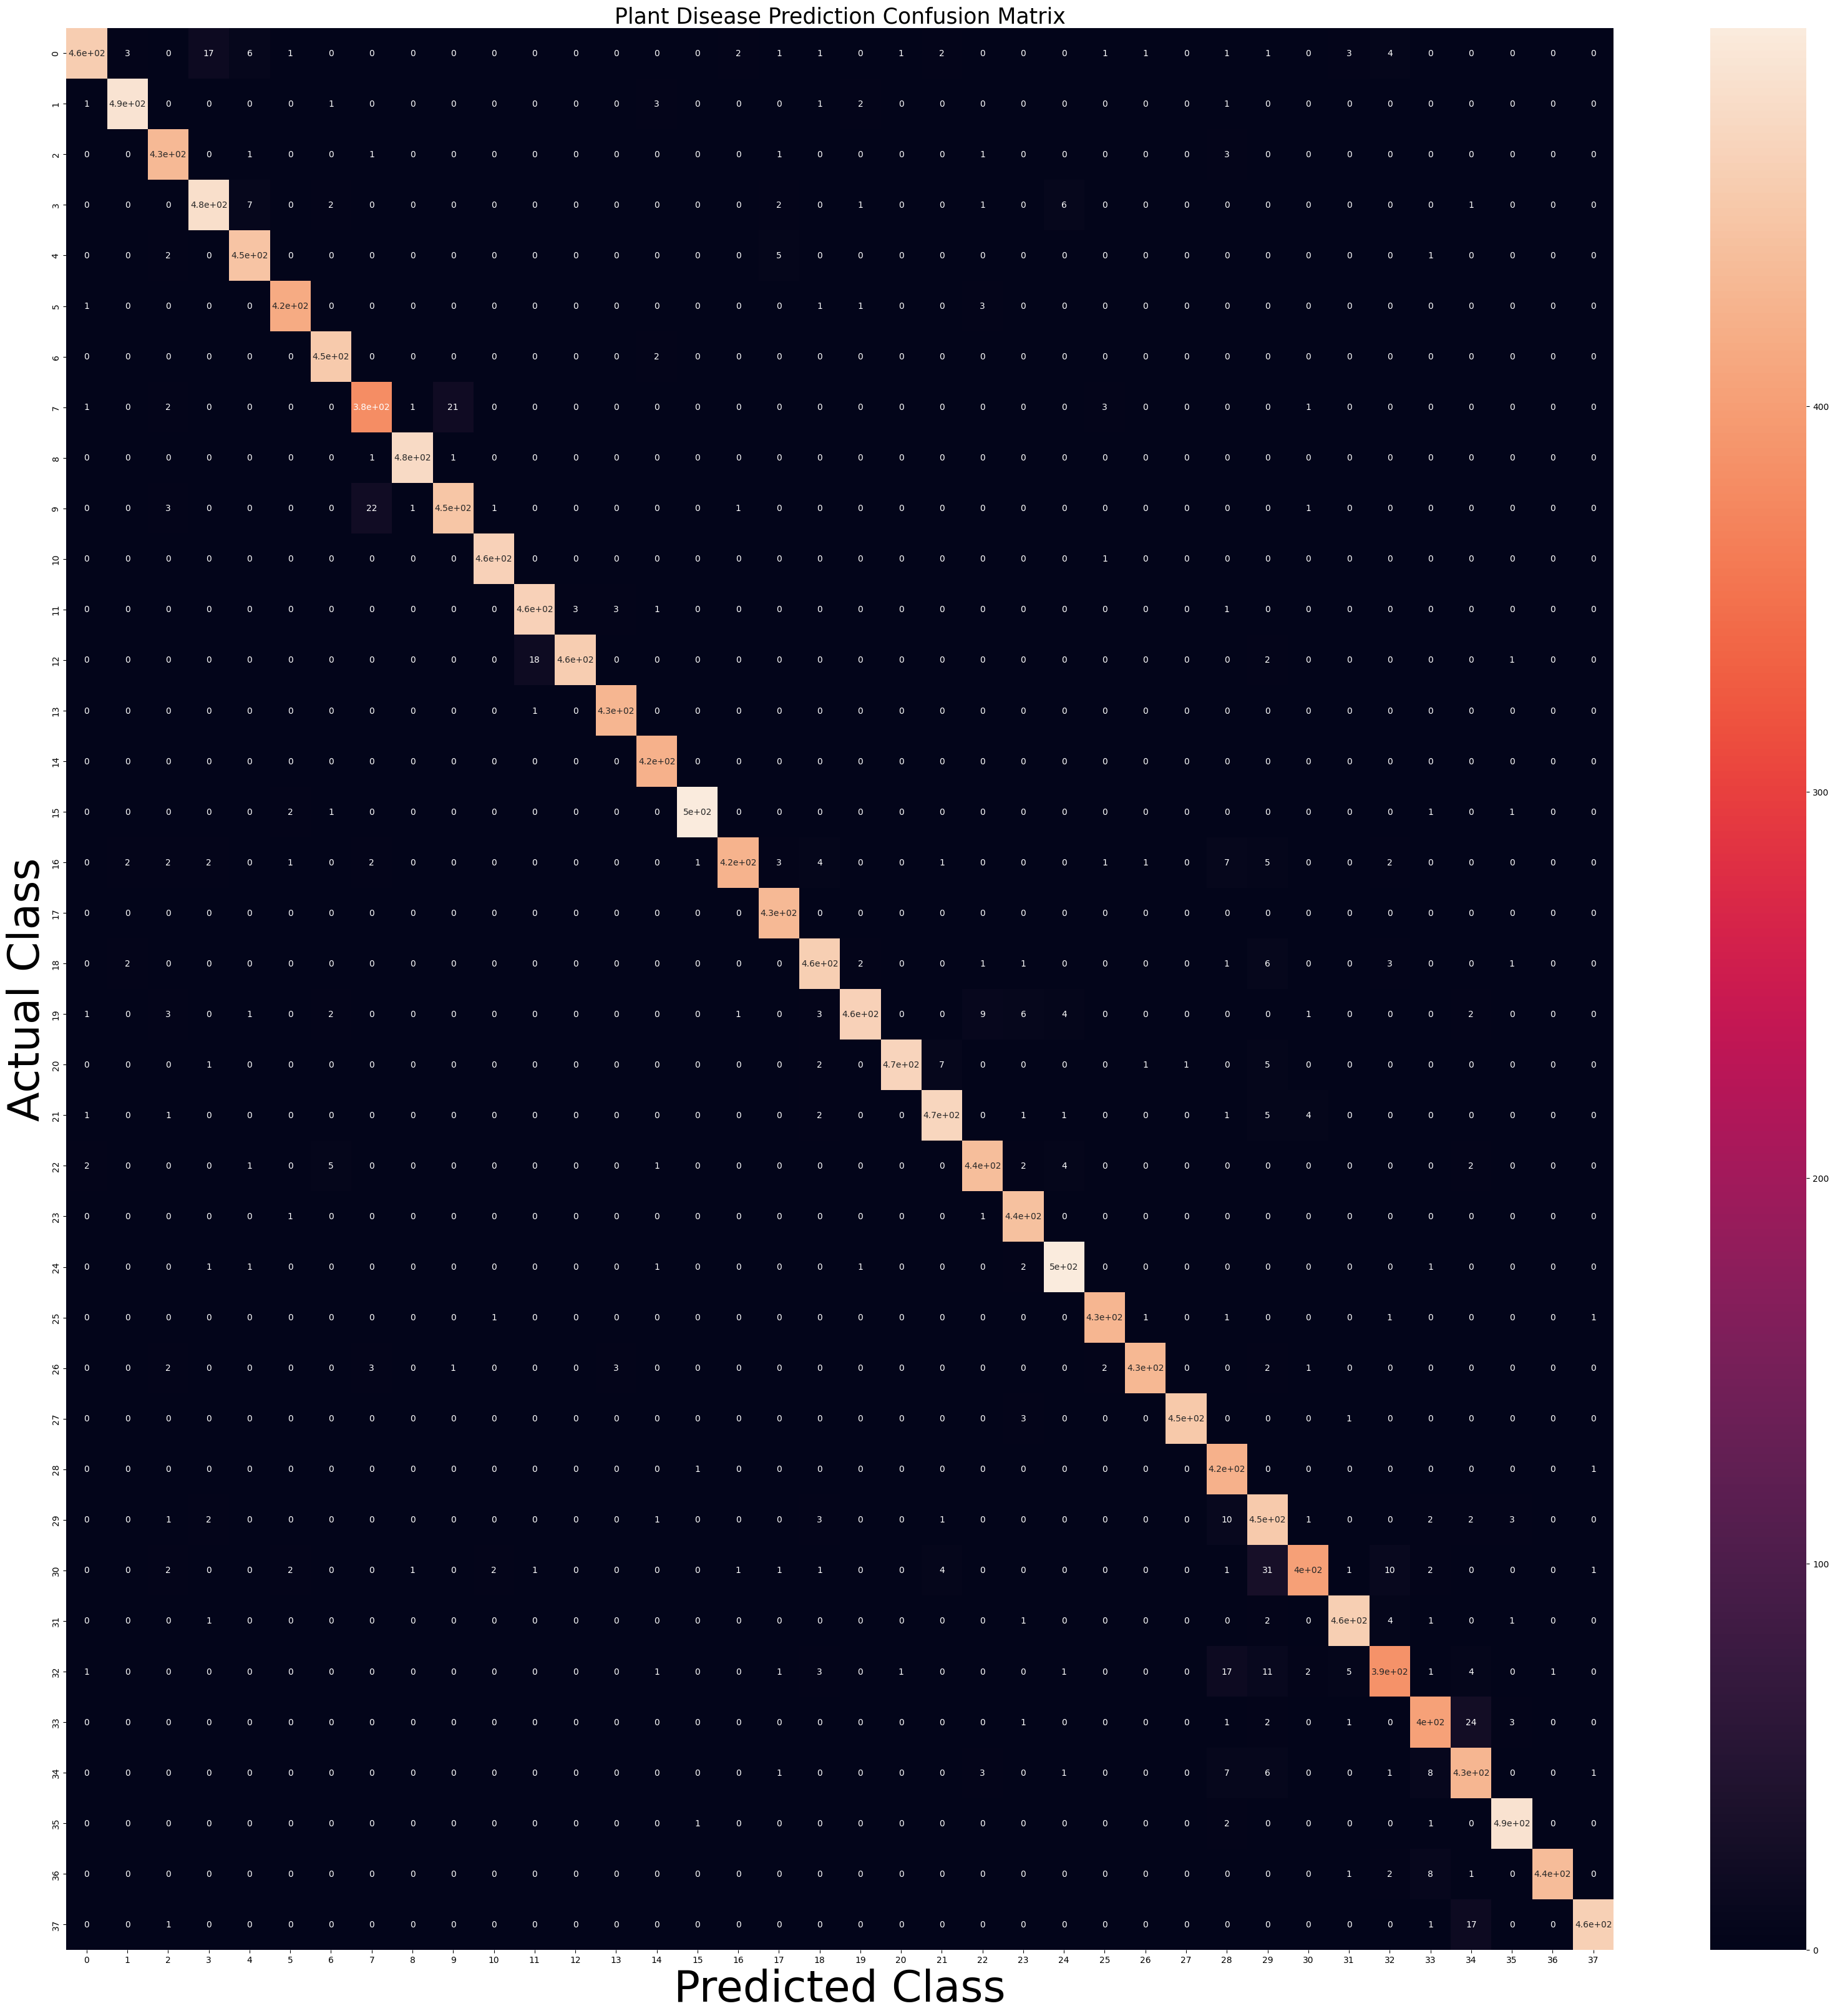

In [63]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize =50)
plt.ylabel('Actual Class',fontsize = 50)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()